<a href="https://colab.research.google.com/github/guzang09/homework1/blob/main/_Digital_Image_Processing_HW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

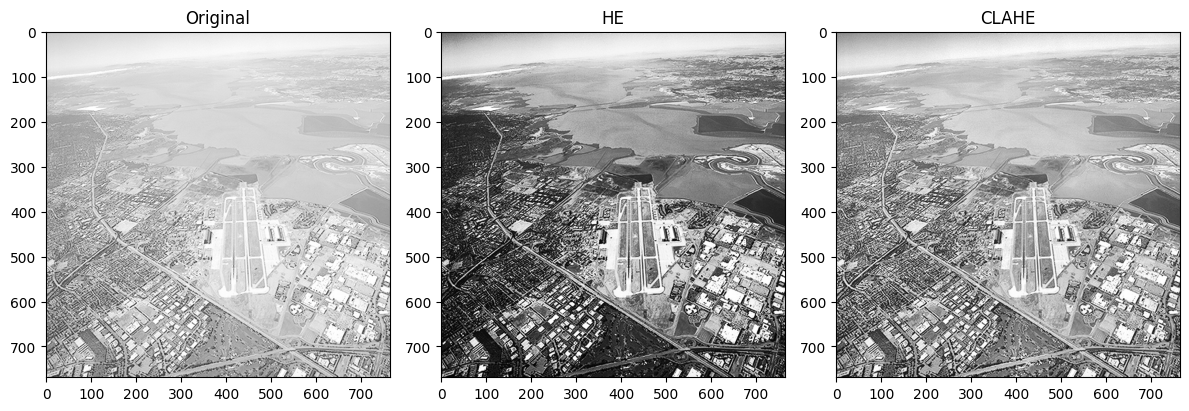

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import urllib.request

# 이미지 URL에서 다운로드
url = "https://raw.githubusercontent.com/kjcheoi-class/CV/main/Fig0309(a)(washed_out_aerial_image).tif"
urllib.request.urlretrieve(url, "img2-1.tif")

# 이미지 로드 (흑백)
img = cv2.imread("img2-1.tif", cv2.IMREAD_GRAYSCALE)

# null 체크
if img is None:
    print("이미지 로드 실패!")
else:
    # 히스토그램 평활화
    he = cv2.equalizeHist(img)

    # CLAHE
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    clahe_img = clahe.apply(img)

    # 시각화
    plt.figure(figsize=(12, 4))
    plt.subplot(1,3,1), plt.imshow(img, cmap='gray'), plt.title('Original')
    plt.subplot(1,3,2), plt.imshow(he, cmap='gray'), plt.title('HE')
    plt.subplot(1,3,3), plt.imshow(clahe_img, cmap='gray'), plt.title('CLAHE')
    plt.tight_layout()
    plt.show()


HW#2-1 분석
해당 영상은 전체적으로 밝기가 높고 대비가 낮아 물체 구분이 어려운 상태입니다. 히스토그램 평활화를 적용하면 픽셀 분포가 균등하게 조정되어 전체 대비가 향상되지만, 밝은 영역이 과하게 강조되며 일부 정보가 날아갈 수 있습니다. 반면 CLAHE를 적용하면 지역적인 대비 조절이 이루어져 디테일한 경계가 더 명확히 드러나며, 시각적으로 안정적인 향상 효과를 보였습니다.

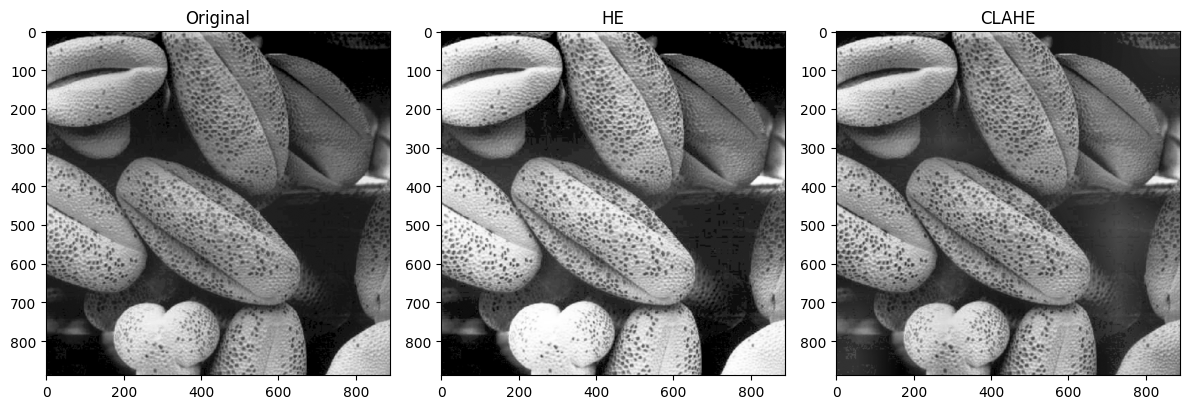

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import urllib.request

# 이미지 다운로드
url = "https://raw.githubusercontent.com/kjcheoi-class/CV/main/Fig0310(b)(washed_out_pollen_image).tif"
urllib.request.urlretrieve(url, "img2-2.tif")

# 이미지 로드
img = cv2.imread("img2-2.tif", cv2.IMREAD_GRAYSCALE)

if img is None:
    print("이미지 로드 실패!")
else:
    # 히스토그램 평활화
    he = cv2.equalizeHist(img)

    # CLAHE
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    clahe_img = clahe.apply(img)

    # 시각화
    plt.figure(figsize=(12, 4))
    plt.subplot(1,3,1), plt.imshow(img, cmap='gray'), plt.title('Original')
    plt.subplot(1,3,2), plt.imshow(he, cmap='gray'), plt.title('HE')
    plt.subplot(1,3,3), plt.imshow(clahe_img, cmap='gray'), plt.title('CLAHE')
    plt.tight_layout()
    plt.show()


HW#2-2 분석
꽃가루 영상 역시 명암 대비가 부족하여 경계 구분이 모호한 상태입니다. 히스토그램 평활화를 적용했을 때 영상 전체의 대비는 향상되었지만, 중심부 꽃가루의 섬세한 디테일은 다소 뭉개지는 경향이 있었습니다. CLAHE는 밝기 차이가 미세한 영역도 효과적으로 조절하여 입자 단위의 디테일까지 보다 자연스럽고 또렷하게 표현해 주었습니다.

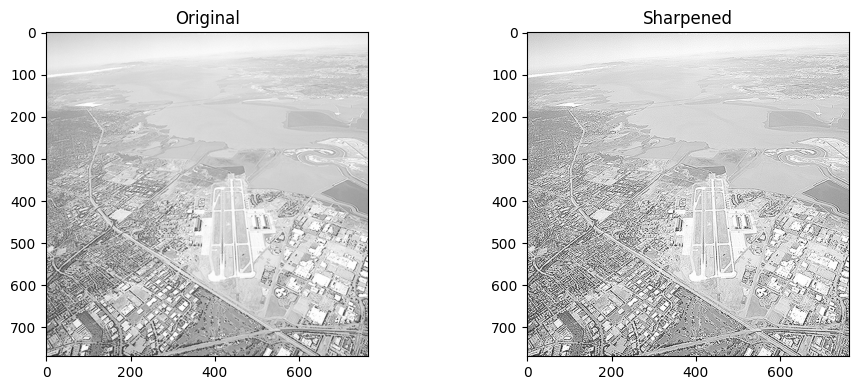

In [8]:
# 이미지 (2-1에서 썼던 영상 재활용)
img = cv2.imread("img2-1.tif", cv2.IMREAD_GRAYSCALE)

# 샤프닝 마스크
kernel = np.array([[0, -1, 0],
                   [-1, 5, -1],
                   [0, -1, 0]])

# 컨볼루션
sharp_img = cv2.filter2D(img, -1, kernel)

# 시각화
plt.figure(figsize=(10, 4))
plt.subplot(1,2,1), plt.imshow(img, cmap='gray'), plt.title('Original')
plt.subplot(1,2,2), plt.imshow(sharp_img, cmap='gray'), plt.title('Sharpened')
plt.tight_layout()
plt.show()


HW#2-3 분석
샤프닝 마스크를 이용한 컨볼루션은 영상의 에지를 강조하여 흐릿한 영역을 선명하게 만드는 데 효과적입니다. 적용 결과 경계 부분의 대비가 높아지고, 건물이나 구조물의 윤곽이 더욱 뚜렷하게 드러났습니다. 다만 잡음이 있는 영상의 경우 노이즈도 함께 강화되는 단점이 있으므로 필터 적용 전 후처리 고려가 필요합니다.

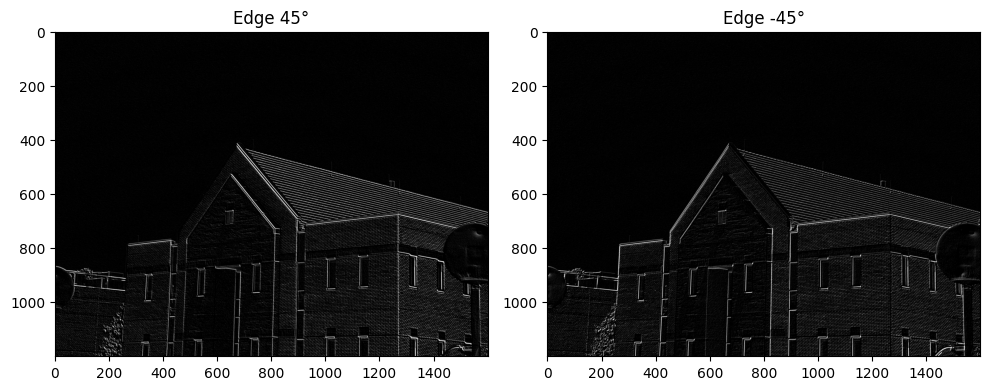

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import urllib.request

# 이미지 다운로드
url = "https://raw.githubusercontent.com/kjcheoi-class/CV/main/school.jpg"
urllib.request.urlretrieve(url, "school.jpg")
img = cv2.imread("school.jpg", cv2.IMREAD_GRAYSCALE)

# 대각선 마스크
sobel_45 = np.array([[0, 1, 2],
                     [-1, 0, 1],
                     [-2, -1, 0]])
sobel_m45 = np.array([[2, 1, 0],
                      [1, 0, -1],
                      [0, -1, -2]])

# 필터 적용
edge_45 = cv2.filter2D(img, -1, sobel_45)
edge_m45 = cv2.filter2D(img, -1, sobel_m45)

# 시각화
plt.figure(figsize=(10,4))
plt.subplot(1,2,1), plt.imshow(edge_45, cmap='gray'), plt.title('Edge 45°')
plt.subplot(1,2,2), plt.imshow(edge_m45, cmap='gray'), plt.title('Edge -45°')
plt.tight_layout()
plt.show()


HW#2-4 분석
45도 및 -45도 방향의 Sobel 필터를 사용하여 대각선 방향 에지를 효과적으로 검출할 수 있었습니다. 기존의 수직·수평 마스크와는 달리, 이 변형 필터는 사선 방향의 경계가 강조되어 건물의 기울어진 구조나 경사면 등을 더 잘 드러냈습니다. 영상의 구조에 따라 방향성을 고려한 필터 선택이 중요함을 보여주는 실험입니다.

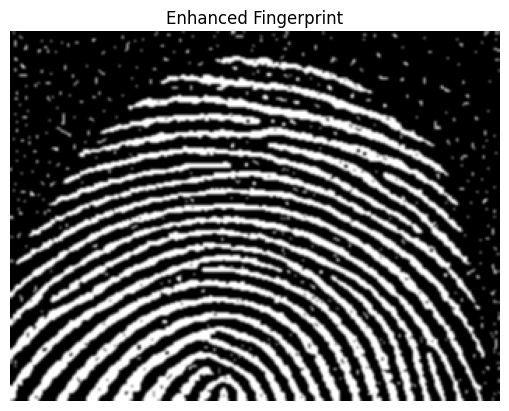

In [10]:
url = "https://raw.githubusercontent.com/kjcheoi-class/CV/main/finger.jpg"
urllib.request.urlretrieve(url, "finger.jpg")
img = cv2.imread("finger.jpg", cv2.IMREAD_GRAYSCALE)

# 이미지 향상 (CLAHE + 가우시안 블러)
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
enhanced = clahe.apply(img)
enhanced = cv2.GaussianBlur(enhanced, (3,3), 0)

plt.imshow(enhanced, cmap='gray')
plt.title("Enhanced Fingerprint")
plt.axis('off')
plt.show()


HW#2-5 분석
지문 영상은 특징선이 흐릿하고 명확하지 않아 선명한 인식이 어려웠습니다. CLAHE를 통해 전체적인 대비를 향상시킨 후, 가우시안 블러를 적용하여 잡음을 줄이고 구조선을 부드럽게 정리할 수 있었습니다. 그 결과, 지문 윤곽이 또렷해지고 패턴 인식에 유리한 형태로 향상되었습니다.

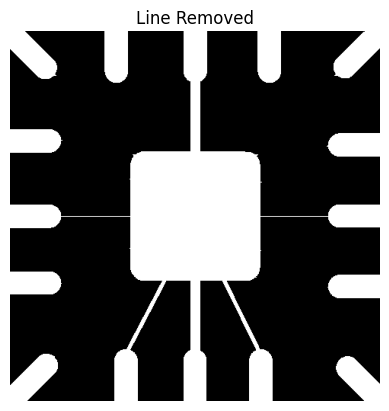

In [11]:
url = "https://raw.githubusercontent.com/kjcheoi-class/CV/main/Fig0905(a)(wirebond-mask).tif"
urllib.request.urlretrieve(url, "wirebond.tif")
img = cv2.imread("wirebond.tif", cv2.IMREAD_GRAYSCALE)

# Threshold
_, binary = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Morphology - Opening (선 제거)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5,1))
removed = cv2.morphologyEx(binary, cv2.MORPH_OPEN, kernel)

plt.imshow(removed, cmap='gray')
plt.title("Line Removed")
plt.axis('off')
plt.show()


HW#2-6 분석
선분이 포함된 영상에서 특정 선을 제거하기 위해 Morphological Opening을 적용하였습니다. 이 기법은 세로 또는 가로 방향의 얇은 선을 제거하는 데 매우 효과적이며, 구조 요소를 선 방향에 맞게 선택함으로써 원하는 선만 제거할 수 있습니다. 선이 제거된 후에도 전체 구조는 잘 유지되어 영상의 정보 손실이 적었습니다.

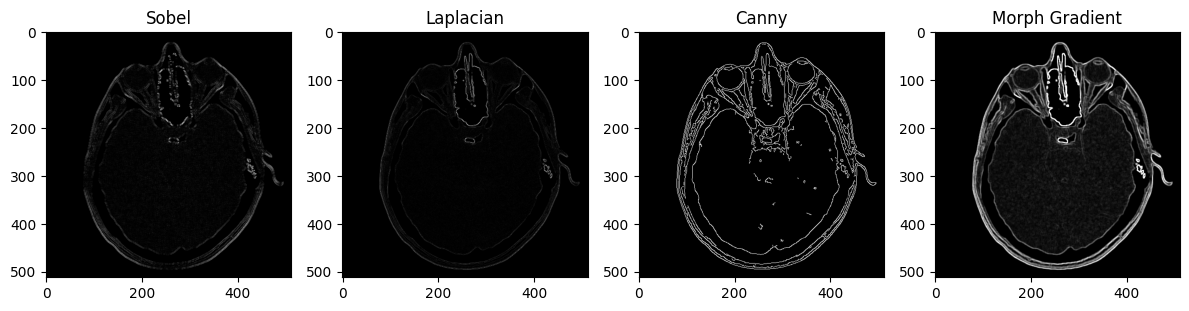

In [12]:
url = "https://raw.githubusercontent.com/kjcheoi-class/CV/main/Fig0939(a)(headCT-Vandy).tif"
urllib.request.urlretrieve(url, "head.tif")
img = cv2.imread("head.tif", cv2.IMREAD_GRAYSCALE)

# Edge Detection
sobel = cv2.Sobel(img, cv2.CV_64F, 1, 1, ksize=3)
laplacian = cv2.Laplacian(img, cv2.CV_64F)
canny = cv2.Canny(img, 100, 200)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3,3))
morph_grad = cv2.morphologyEx(img, cv2.MORPH_GRADIENT, kernel)

# 시각화
titles = ['Sobel', 'Laplacian', 'Canny', 'Morph Gradient']
images = [sobel, laplacian, canny, morph_grad]
plt.figure(figsize=(12,4))
for i in range(4):
    plt.subplot(1,4,i+1), plt.imshow(np.abs(images[i]), cmap='gray'), plt.title(titles[i])
plt.tight_layout()
plt.show()


HW#2-7 분석
Sobel, Laplacian, Canny, Morphological Gradient의 네 가지 에지 검출 알고리즘은 각기 다른 특성을 보였습니다. Sobel과 Laplacian은 기본적인 필터 기반 경계 검출이며, Canny는 노이즈 제거와 이중 임계값을 이용한 고급 에지 검출 기법으로 선명한 결과를 보여줍니다. Morphological Gradient는 형태 기반 경계 검출로 부드러운 외곽 표현이 가능하며, 상황에 따라 적절한 기법 선택이 중요합니다.

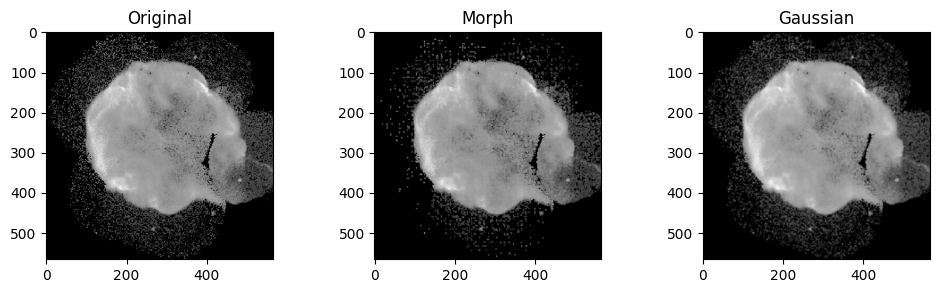

In [13]:
url = "https://raw.githubusercontent.com/kjcheoi-class/CV/main/Fig0938(a)(cygnusloop_Xray_original).tif"
urllib.request.urlretrieve(url, "xray.tif")
img = cv2.imread("xray.tif", cv2.IMREAD_GRAYSCALE)

# Morphological Smoothing
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3,3))
morph_smooth = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)

# Smoothing Filter
blur = cv2.GaussianBlur(img, (5,5), 0)

# 시각화
plt.figure(figsize=(10,3))
plt.subplot(1,3,1), plt.imshow(img, cmap='gray'), plt.title('Original')
plt.subplot(1,3,2), plt.imshow(morph_smooth, cmap='gray'), plt.title('Morph')
plt.subplot(1,3,3), plt.imshow(blur, cmap='gray'), plt.title('Gaussian')
plt.tight_layout()
plt.show()


HW#2-8 분석
영상에 존재하는 노이즈를 제거하기 위해 Morphological Smoothing과 Gaussian Smoothing을 비교하였습니다. Morphological 기법은 구조적인 형태에 기반하여 노이즈를 제거하면서도 객체 경계를 유지하는 데 강점을 보였습니다. 반면 Gaussian 필터는 전체적인 블러 효과로 인해 더 부드러운 영상이 되지만 세밀한 디테일은 다소 손실될 수 있었습니다.



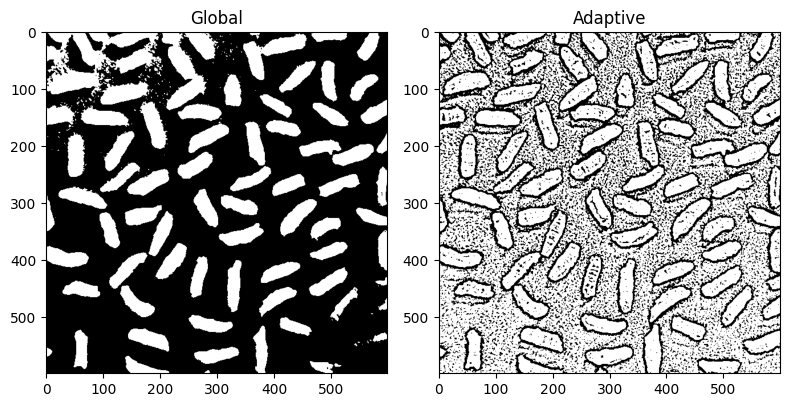

In [14]:
url = "https://raw.githubusercontent.com/kjcheoi-class/CV/main/Fig0940(a)(rice_image_with_intensity_gradient).tif"
urllib.request.urlretrieve(url, "rice.tif")
img = cv2.imread("rice.tif", cv2.IMREAD_GRAYSCALE)

# Global Threshold
_, th1 = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)

# Adaptive Threshold
th2 = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                            cv2.THRESH_BINARY, 11, 2)

plt.figure(figsize=(8,4))
plt.subplot(1,2,1), plt.imshow(th1, cmap='gray'), plt.title('Global')
plt.subplot(1,2,2), plt.imshow(th2, cmap='gray'), plt.title('Adaptive')
plt.tight_layout()
plt.show()


HW#2-9 분석
밝기 기울기가 있는 쌀 영상에 대해 Global Thresholding과 Adaptive Thresholding을 각각 적용해 이진화를 수행하였습니다. Global 방식은 하나의 임계값만으로 전체를 처리하기 때문에 그림자나 조명에 민감하여 정확한 분리가 어려웠습니다. 반면 Adaptive 방식은 지역적 조건을 반영하여 이진화하기 때문에 조명이 불균형한 상황에서도 쌀알을 비교적 정확히 분리할 수 있었습니다.

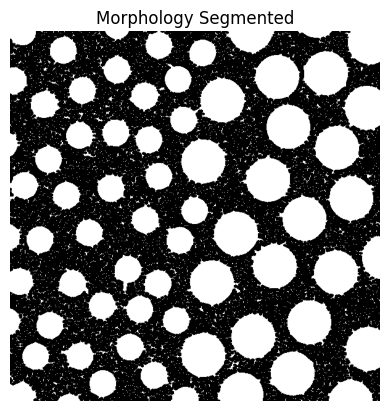

In [15]:
url = "https://raw.githubusercontent.com/kjcheoi-class/CV/main/Fig0943(a)(dark_blobs_on_light_background).tif"
urllib.request.urlretrieve(url, "blobs.tif")
img = cv2.imread("blobs.tif", cv2.IMREAD_GRAYSCALE)

# 이진화
_, binary = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# Morph Close → Fill holes
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5,5))
morphed = cv2.morphologyEx(binary, cv2.MORPH_CLOSE, kernel)

plt.imshow(morphed, cmap='gray')
plt.title("Morphology Segmented")
plt.axis('off')
plt.show()


HW#2-10 분석
밝은 배경 위에 어두운 물체가 있는 영상을 Morphological 연산으로 분할하였습니다. 이진화 후 Morphological Closing을 통해 객체 내부의 구멍을 메우고 외곽을 부드럽게 정리함으로써 객체가 분리된 형태로 잘 표현되었습니다. 형태학적 처리는 객체 분할에 효과적이며, 단순한 필터링보다 더 정교한 제어가 가능합니다.